In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model


import itertools
import datetime
from pandas import to_datetime
from datetime import datetime
import statsmodels.api as sm

%matplotlib inline

In [2]:
dataframe = pd.read_csv('https://raw.githubusercontent.com/MuhammadAliAhsan/Time-Series/main/data/PT_Train.csv', parse_dates=['Timestamp (GMT)'], index_col=['Timestamp (GMT)'])

# print the shape
dataframe.head()

,Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
Timestamp (GMT),,,,
2015-08-17 15:09:00,139,41,NaN,NaN
2015-08-17 15:10:00,144,40,92.0,140.0
2015-08-17 15:11:00,140,42,89.0,144.0
2015-08-17 15:12:00,138,45,93.0,141.0
2015-08-17 15:13:00,133,42,94.0,134.0


In [3]:
dataframe.describe()

,Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
count,226.000000,226.000000,191.000000,191.000000
mean,2315.615044,2219.216814,83.450262,126.335079
std,11351.588825,11370.093548,29.802974,46.348142
min,106.000000,34.000000,-1.000000,-1.000000
25%,136.000000,38.000000,92.000000,134.000000
50%,145.000000,46.000000,93.000000,139.000000
75%,156.000000,53.000000,95.000000,149.000000
max,61442.000000,61442.000000,98.000000,166.000000


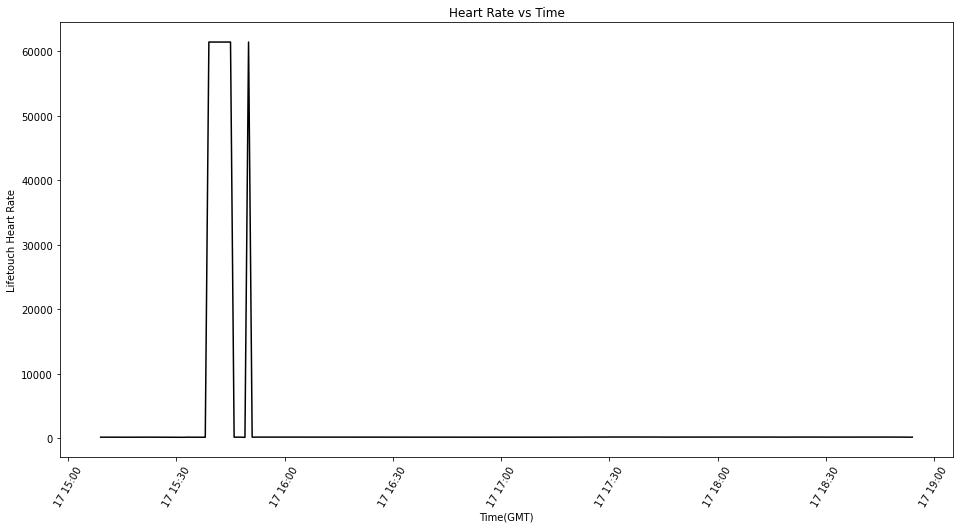

In [4]:
plt.figure(figsize=(16,8))
plt.plot( dataframe['Lifetouch Heart Rate'], color="black")
plt.title('Heart Rate vs Time')
plt.xlabel('Time(GMT)')
plt.xticks(rotation=60)
plt.ylabel('Lifetouch Heart Rate')
plt.show()

In [5]:
mod = dataframe['Lifetouch Heart Rate'].mode().iloc[0]
print(mod)

136


In [6]:
df = dataframe[['Lifetouch Heart Rate']]
df.loc[(df['Lifetouch Heart Rate'] >= 6000),'Lifetouch Heart Rate'] = int(mod)

df.describe()

,Lifetouch Heart Rate
count,226.000000
mean,145.513274
std,11.277994
min,106.000000
25%,136.000000
50%,142.000000
75%,155.000000
max,172.000000


In [7]:
df.head(15)

,Lifetouch Heart Rate
Timestamp (GMT),
2015-08-17 15:09:00,139
2015-08-17 15:10:00,144
2015-08-17 15:11:00,140
2015-08-17 15:12:00,138
2015-08-17 15:13:00,133
2015-08-17 15:14:00,132
2015-08-17 15:15:00,132
2015-08-17 15:16:00,133
2015-08-17 15:17:00,136


**Plotting the graph after removing high values**

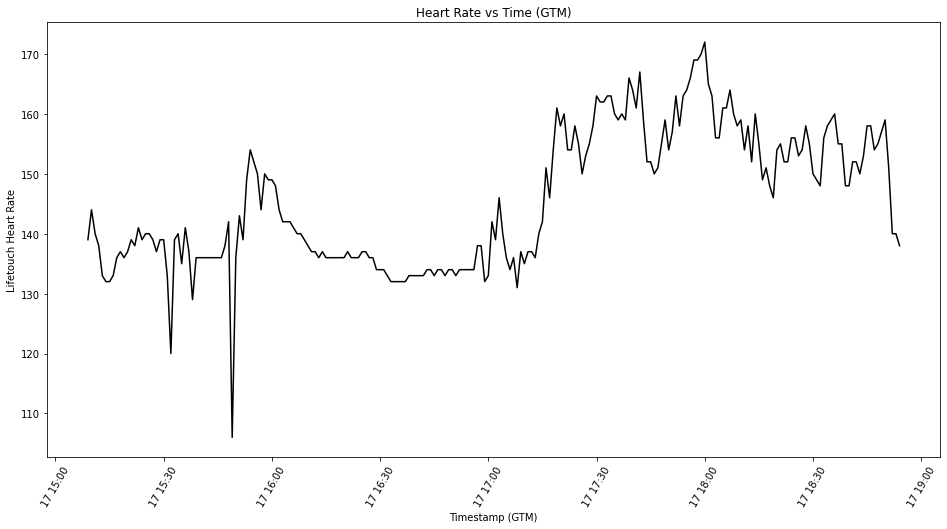

In [8]:
plt.figure(figsize=(16,8))
plt.plot(df, color="black")
plt.title('Heart Rate vs Time (GTM)')
plt.xlabel('Timestamp (GTM)')
plt.xticks(rotation=60)
plt.ylabel('Lifetouch Heart Rate')
plt.show()

In [9]:
_mean = int(df["Lifetouch Heart Rate"].mean())
df.loc[(df['Lifetouch Heart Rate'] < 130),'Lifetouch Heart Rate'] = _mean

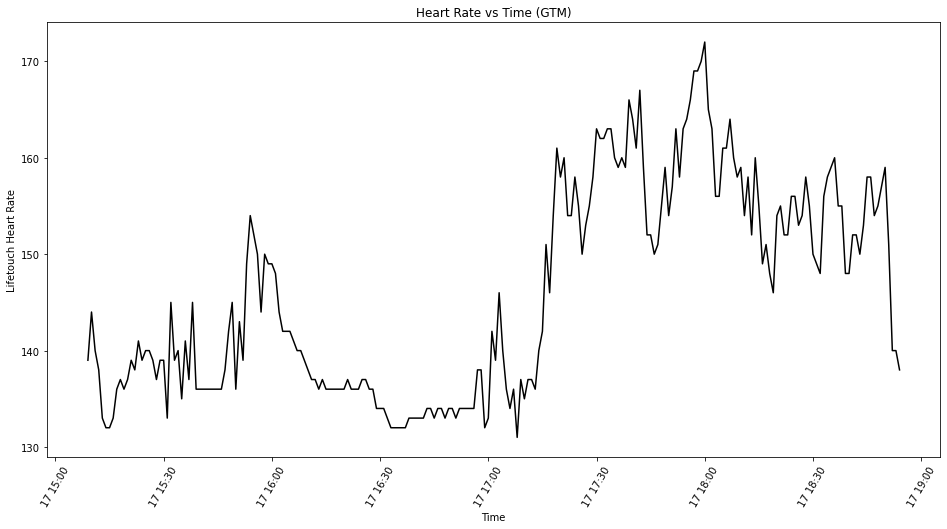

In [10]:
plt.figure(figsize=(16,8))
plt.plot(df, color="black")
plt.title('Heart Rate vs Time (GTM)')
plt.xlabel('Time')
plt.xticks(rotation=60)
plt.ylabel('Lifetouch Heart Rate')
plt.show()

# Stationarity Check using KPSS Method

In [11]:
def check_stationarity(series):
    statistic, p_value, n_lags, critical_values = sm.tsa.stattools.kpss(series)
    print(f'p value: {p_value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary \n')

In [12]:
check_stationarity(df['Lifetouch Heart Rate'])

p value: 0.01
Result: The series is not stationary 



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [13]:
df['DiffValues'] = df[['Lifetouch Heart Rate']].diff(axis=0, periods=1)
df = df.dropna()
df.head(15)

,Lifetouch Heart Rate,DiffValues
Timestamp (GMT),,
2015-08-17 15:10:00,144,5.0
2015-08-17 15:11:00,140,-4.0
2015-08-17 15:12:00,138,-2.0
2015-08-17 15:13:00,133,-5.0
2015-08-17 15:14:00,132,-1.0
2015-08-17 15:15:00,132,0.0
2015-08-17 15:16:00,133,1.0
2015-08-17 15:17:00,136,3.0
2015-08-17 15:18:00,137,1.0


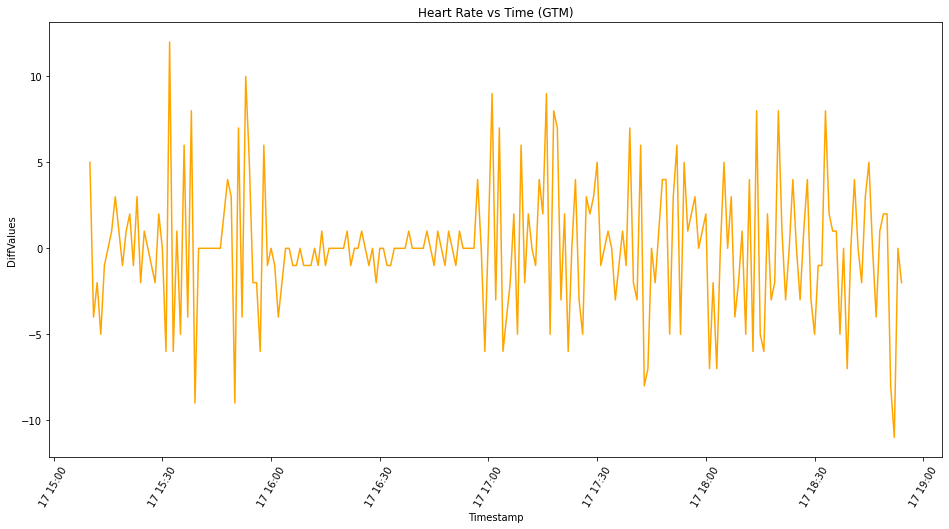

In [14]:
plt.figure(figsize=(16,8))
plt.plot(df['DiffValues'], color="Orange")
plt.title('Heart Rate vs Time (GTM)')
plt.xlabel('Timestamp')
plt.xticks(rotation=60)
plt.ylabel('DiffValues')
plt.show()

**Now the series seems pretty much stationary but let's check it through proper method**

In [15]:
check_stationarity(df['DiffValues'])

p value: 0.1
Result: The series is stationary 



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [16]:
new_df = df['DiffValues']

split = len(new_df) - int(0.2*len(new_df))
print(f'Use {split} rows for training data')
print(f'Use {len(new_df) - split} rows for testiing data')
train = new_df[0:split]
test = new_df[split:]


print('Ttrain Data Shape', train.shape)
print('Test Data Shape', test.shape)

Use 180 rows for training data
Use 45 rows for testiing data
Ttrain Data Shape (180,)
Test Data Shape (45,)


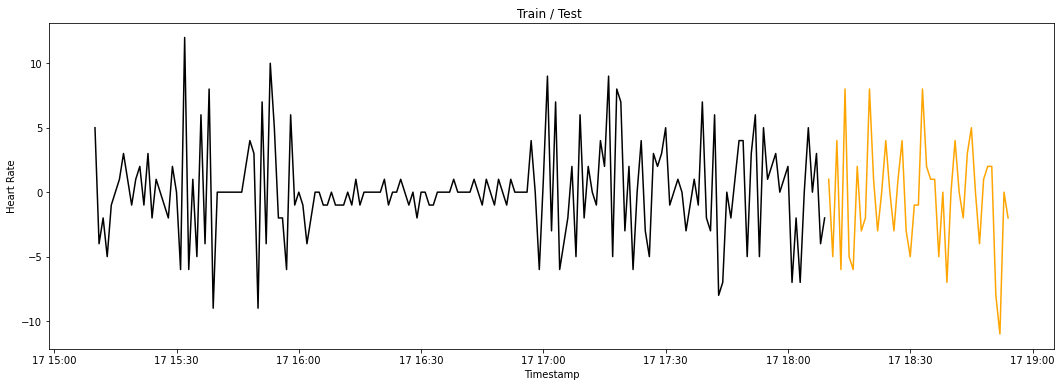

In [17]:
plt.figure(figsize=(18, 6))
plt.plot(train, color = "black")
plt.plot(test, color = "orange")
plt.ylabel('Heart Rate')
plt.xlabel('Timestamp')
plt.title("Train / Test ")
plt.show()

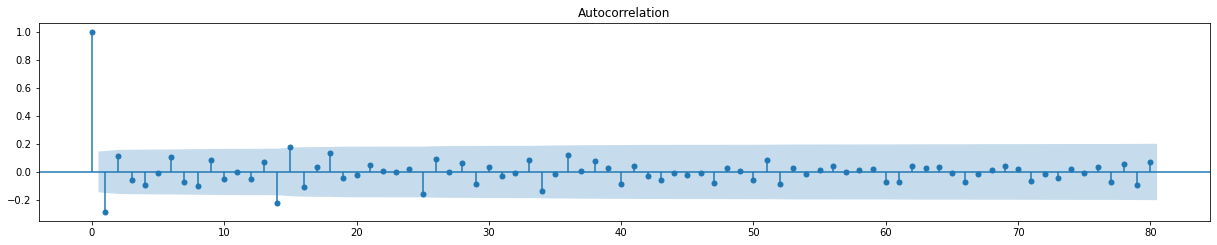

In [18]:
fig = plt.figure(figsize=(21,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train, lags=80, ax=ax1)

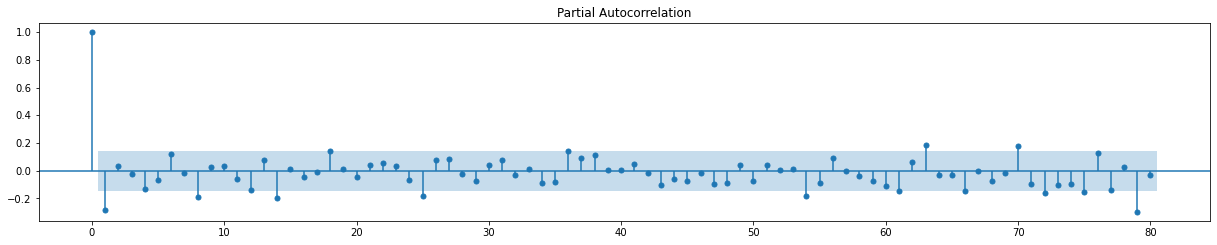

In [19]:
fig = plt.figure(figsize=(21,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_pacf(train, lags=80, ax=ax1)

# p = 18, d = 1 and q = 18

In [20]:
# Finding the best value for ARIMA and training the model on the best values i.e. (18, 1, 18)
arima = sm.tsa.arima.ARIMA(train, order = (18, 1, 18))
arima_fit = arima.fit()
forecast = arima_fit.predict(start = len(train), end = test.index[-1])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [21]:
from numpy import sqrt

aic = arima_fit.aic
rms_error = mean_squared_error(test.values, forecast.values, squared=False)
print("AIC: " + str(aic), "\nRMSE: " + str(rms_error))

AIC: 973.5892389566961 
RMSE: 4.2986904676615385


In [22]:
# Reverting the differenced forecasted values into normal values
split = len(df) - int(0.2*len(df))
test_orignal = df[split:]

x = []
reverse_value = test + test_orignal['Lifetouch Heart Rate'].shift(-1)
x.append(reverse_value)
reverted_forecast = pd.concat(x, axis=1)

reverted_forecast.head()

,0
Timestamp (GMT),
2015-08-17 18:10:00,155.0
2015-08-17 18:11:00,153.0
2015-08-17 18:12:00,156.0
2015-08-17 18:13:00,154.0
2015-08-17 18:14:00,163.0


**Plotting the graph to verify forecasted values against testing data**

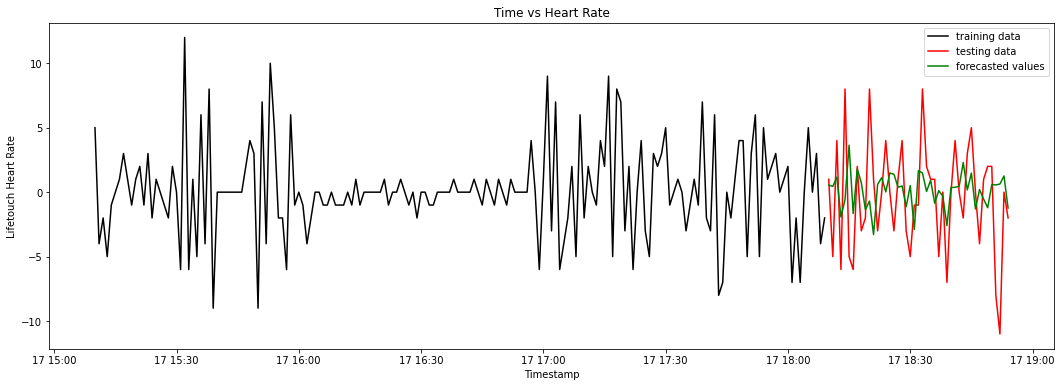

In [23]:
plt.figure(figsize=(18, 6))
plt.plot(train, color = "black", label="training data")
plt.plot(test, color = "red", label="testing data")
plt.plot(forecast, color = "green", label="forecasted values")
plt.ylabel('Lifetouch Heart Rate')
plt.xlabel('Timestamp')
plt.title("Time vs Heart Rate")
plt.legend()

In [24]:
# Predicting the next 20 values using the model we trained
prediction = arima_fit.predict(start = len(df), end = len(df) + 19)

In [25]:
print("Total Predictions" ,len(prediction), "\n")
print(prediction)

Total Predictions 20 

2015-08-17 18:55:00    0.629522
2015-08-17 18:56:00   -1.094329
2015-08-17 18:57:00   -1.502771
2015-08-17 18:58:00    0.783730
2015-08-17 18:59:00   -0.521089
2015-08-17 19:00:00    1.594325
2015-08-17 19:01:00    0.728070
2015-08-17 19:02:00    1.097018
2015-08-17 19:03:00    0.767969
2015-08-17 19:04:00   -0.675655
2015-08-17 19:05:00   -0.402636
2015-08-17 19:06:00   -0.473146
2015-08-17 19:07:00   -1.077787
2015-08-17 19:08:00    0.975408
2015-08-17 19:09:00   -0.445788
2015-08-17 19:10:00    1.531599
2015-08-17 19:11:00    0.254437
2015-08-17 19:12:00   -0.420440
2015-08-17 19:13:00    0.585115
2015-08-17 19:14:00   -1.418283
Freq: T, Name: predicted_mean, dtype: float64


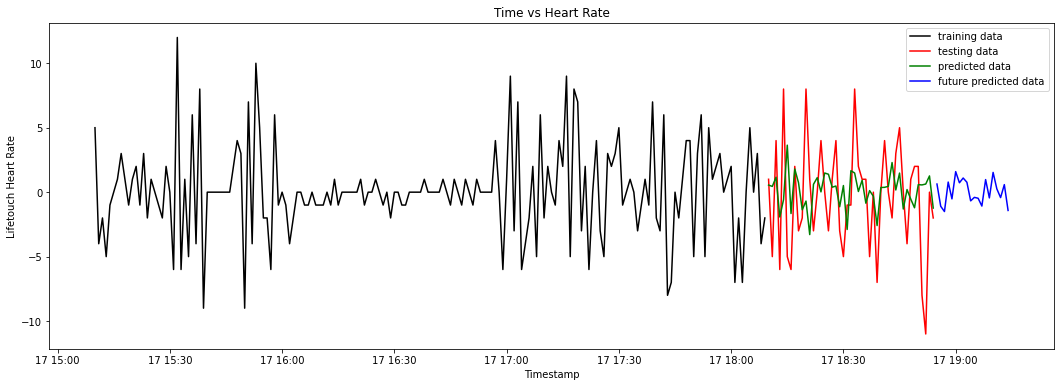

In [26]:
# Plotting graph for predicted values along with previous data
plt.figure(figsize=(18, 6))
plt.plot(train, color = "black", label="training data")
plt.plot(test, color = "red", label="testing data")
plt.plot(forecast, color = "green", label="predicted data")
plt.plot(prediction, color = "blue", label="future predicted data")
plt.ylabel('Lifetouch Heart Rate')
plt.xlabel('Timestamp')
plt.title("Time vs Heart Rate")
plt.legend()

In [27]:
# Reverting the differenced training and testing data into normal
x = []
reverse_value = df['Lifetouch Heart Rate'] + df['DiffValues'].shift(-1)
x.append(reverse_value)
df['NonDiffValues'] = pd.concat(x, axis=1)

df.head(15)

,Lifetouch Heart Rate,DiffValues,NonDiffValues
Timestamp (GMT),,,
2015-08-17 15:10:00,144,5.0,140.0
2015-08-17 15:11:00,140,-4.0,138.0
2015-08-17 15:12:00,138,-2.0,133.0
2015-08-17 15:13:00,133,-5.0,132.0
2015-08-17 15:14:00,132,-1.0,132.0
2015-08-17 15:15:00,132,0.0,133.0
2015-08-17 15:16:00,133,1.0,136.0
2015-08-17 15:17:00,136,3.0,137.0
2015-08-17 15:18:00,137,1.0,136.0


**Reverting the predicted data from differenced values to normal**

In [28]:
reverted_pred = np.hstack((df['Lifetouch Heart Rate'][0], prediction)).cumsum()
reverted_pred = reverted_pred.round(0).astype(int)

print(reverted_pred)

[144 145 144 142 143 142 144 145 146 146 146 145 145 144 145 144 146 146
 146 146 145]


**Droping the first index**

In [29]:
reverted_pred = np.delete(reverted_pred, 0)
print("Total Conversions", len(reverted_pred), "\n")
print(reverted_pred)

Total Conversions 20 

[145 144 142 143 142 144 145 146 146 146 145 145 144 145 144 146 146 146
 146 145]


In [30]:
new_df = pd.DataFrame([], columns=['Timestamp (GMT)', 'PredHeartRate'])

new_df['PredHeartRate'] = reverted_pred
new_df['Timestamp (GMT)'] = prediction.index
new_df.set_index('Timestamp (GMT)', inplace=True)

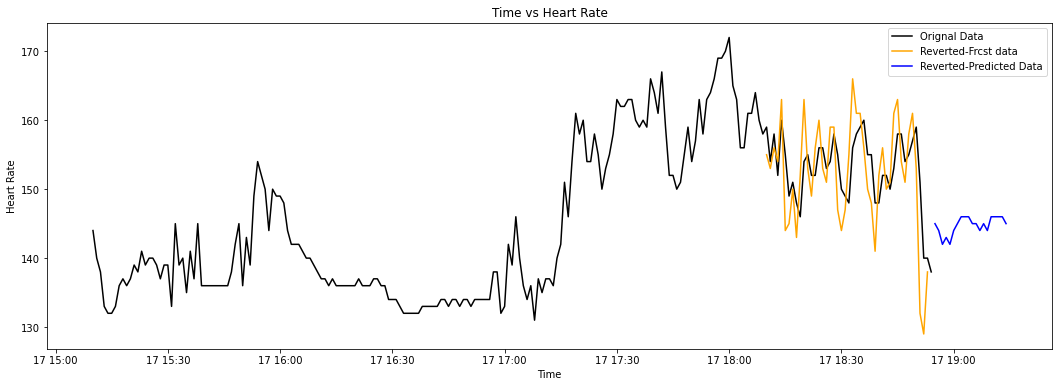

In [31]:
plt.figure(figsize=(18, 6))
plt.plot(df['Lifetouch Heart Rate'], color = "black", label="Orignal Data")
plt.plot(reverted_forecast, color = "orange", label="Reverted-Frcst data")
plt.plot(new_df, color = "blue", label="Reverted-Predicted Data")
plt.ylabel('Heart Rate')
plt.xlabel('Time')
plt.title("Time vs Heart Rate")
plt.legend()

In [32]:
new_df.to_csv('Predictions.csv', header=True)